# Libraries

In [50]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from prophet import Prophet

## Read Data

In [51]:
filename = "../../data/data.csv"

In [52]:
df = pd.read_csv(filename)

In [53]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

In [54]:
df.head()

,datetime,consumption,temp
0,"12/19/2018, 3:00:02 PM",249,69
1,"12/19/2018, 4:00:03 PM",294,69
2,"12/19/2018, 6:00:02 PM",287,69
3,"12/19/2018, 7:00:02 PM",285,69
4,"12/19/2018, 8:00:02 PM",228,69


### Convert index to datetime

In [55]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_996\1436439848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])


,consumption,temp
datetime,,
2018-12-19 15:00:02,249,69
2018-12-19 16:00:03,294,69
2018-12-19 18:00:02,287,69
2018-12-19 19:00:02,285,69
2018-12-19 20:00:02,228,69


### Verify that no value is null

In [56]:
df.isna().sum()

consumption    0
temp           0
dtype: int64

In [57]:
df['consumption'] = df['consumption'] + 1

In [58]:
min(df.consumption)

1

# Energy Consumption vs Datetime Graph

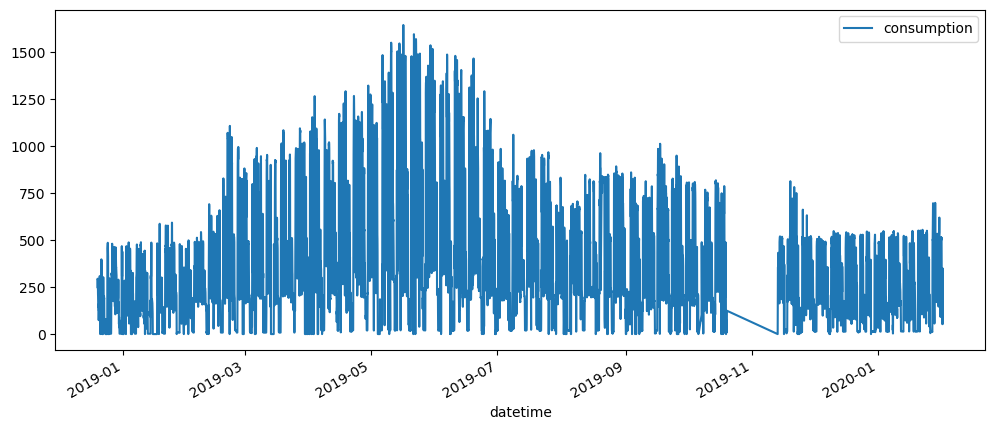

In [59]:
df.plot(y=['consumption'],figsize=(12,5),legend=True)
plt.show()

# Temperature vs Datetime Graph

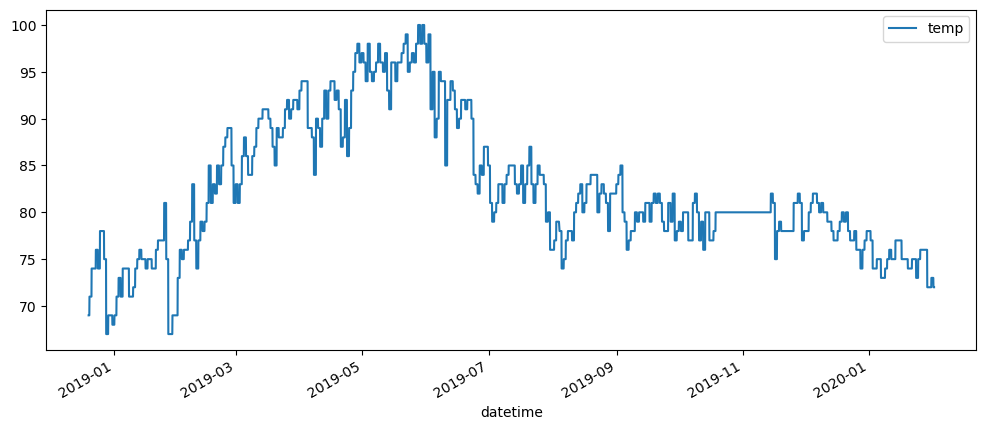

In [60]:
df.plot(y=['temp'],figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [61]:
df.nlargest(10,'consumption')

,consumption,temp
datetime,,
2019-05-16 12:00:02,1643,96
2019-05-16 11:00:01,1620,96
2019-05-21 15:00:02,1594,98
2019-05-21 16:00:02,1583,98
2019-05-22 14:00:02,1568,99
2019-05-22 15:00:02,1568,99
2019-05-22 12:00:01,1554,99
2019-05-22 13:00:02,1551,99
2019-05-10 15:00:02,1549,96


# Maximum Temperature Values (in °F)

In [62]:
df.nlargest(10,'temp')

,consumption,temp
datetime,,
2019-05-27 22:00:02,490,100
2019-05-27 23:00:02,484,100
2019-05-28 00:00:02,470,100
2019-05-28 01:00:02,464,100
2019-05-28 02:00:01,422,100
2019-05-28 03:00:02,389,100
2019-05-28 04:00:02,369,100
2019-05-28 05:00:02,304,100
2019-05-28 06:00:02,246,100


In [63]:
df = df.reset_index()

In [64]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

## Changing dataframe format specific to Prophet Model

In [65]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [66]:
df.count()

ds      9041
y       9041
temp    9041
dtype: int64

In [67]:
df.nlargest(10,'y')

,ds,y,temp
3502,2019-05-16 12:00:02,1643,96
3501,2019-05-16 11:00:01,1620,96
3625,2019-05-21 15:00:02,1594,98
3626,2019-05-21 16:00:02,1583,98
3648,2019-05-22 14:00:02,1568,99
3649,2019-05-22 15:00:02,1568,99
3646,2019-05-22 12:00:01,1554,99
3647,2019-05-22 13:00:02,1551,99
3361,2019-05-10 15:00:02,1549,96
3650,2019-05-22 16:00:01,1548,99


## Taking log of consumption values

In [68]:
df.y = np.log(df.y)

## Model Fitting

In [69]:
model = Prophet()
model.add_country_holidays(country_name='IN')
model.add_regressor('temp')

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\holidays\countries\india.py:101: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)


In [70]:
model.fit(df)

23:03:23 - cmdstanpy - INFO - Chain [1] start processing
23:03:29 - cmdstanpy - INFO - Chain [1] done processing


# List of Holidays 

In [71]:
model.train_holiday_names

0        Makar Sankranti / Pongal
1                    Republic Day
2                Independence Day
3                  Gandhi Jayanti
4                      Labour Day
5                          Diwali
6                            Holi
7     Day of Ashura* (*estimated)
8            Mawlid* (*estimated)
9       Eid ul-Fitr* (*estimated)
10      Eid al-Adha* (*estimated)
11                    Palm Sunday
12                    Good Friday
13                  Easter Sunday
14             Feast of Pentecost
15                  Christmas Day
dtype: object

## Predictions

In [72]:
prediction=model.predict(df)

In [73]:
org_prediction = prediction.copy()

In [74]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3956,2019-06-04 10:00:02,5.636071,5.904181,9.083445,5.636071,5.636071,0.0,0.0,0.0,0.0,...,0.182553,0.182553,0.182553,0.826529,0.826529,0.826529,0.0,0.0,0.0,7.511631
3957,2019-06-04 11:00:03,5.636055,5.859843,9.103074,5.636055,5.636055,0.0,0.0,0.0,0.0,...,0.182553,0.182553,0.182553,0.796662,0.796662,0.796662,0.0,0.0,0.0,7.509410
3788,2019-05-28 10:00:02,5.638733,5.690528,8.849055,5.638733,5.638733,0.0,0.0,0.0,0.0,...,0.255910,0.255910,0.255910,0.826529,0.826529,0.826529,0.0,0.0,0.0,7.390180
3789,2019-05-28 11:00:01,5.638717,5.729495,8.936652,5.638717,5.638717,0.0,0.0,0.0,0.0,...,0.255910,0.255910,0.255910,0.796680,0.796680,0.796680,0.0,0.0,0.0,7.388010
3958,2019-06-04 12:00:02,5.636039,5.721218,8.901624,5.636039,5.636039,0.0,0.0,0.0,0.0,...,0.182553,0.182553,0.182553,0.763242,0.763242,0.763242,0.0,0.0,0.0,7.378544
3620,2019-05-21 10:00:02,5.616727,5.848022,8.875635,5.616727,5.616727,0.0,0.0,0.0,0.0,...,0.226567,0.226567,0.226567,0.826529,0.826529,0.826529,0.0,0.0,0.0,7.338831
3621,2019-05-21 11:00:02,5.616887,5.699622,8.884041,5.616887,5.616887,0.0,0.0,0.0,0.0,...,0.226567,0.226567,0.226567,0.796671,0.796671,0.796671,0.0,0.0,0.0,7.336811
3961,2019-06-04 15:00:02,5.635992,5.715466,8.945996,5.635992,5.635992,0.0,0.0,0.0,0.0,...,0.182553,0.182553,0.182553,0.648143,0.648143,0.648143,0.0,0.0,0.0,7.300389
3955,2019-06-04 09:00:02,5.636087,5.605981,8.853976,5.636087,5.636087,0.0,0.0,0.0,0.0,...,0.182553,0.182553,0.182553,0.852170,0.852170,0.852170,0.0,0.0,0.0,7.285211
3962,2019-06-04 16:00:02,5.635976,5.686894,8.838629,5.635976,5.635976,0.0,0.0,0.0,0.0,...,0.182553,0.182553,0.182553,0.607050,0.607050,0.607050,0.0,0.0,0.0,7.272680


### Let's check for effect of Gandhi Jayanti on Energy consumption value

In [75]:
prediction.nlargest(10,'Gandhi Jayanti')[['ds','Gandhi Jayanti']]

,ds,Gandhi Jayanti
6752,2019-10-02 00:00:01,0.061107
6753,2019-10-02 01:00:02,0.061107
6754,2019-10-02 02:00:01,0.061107
6755,2019-10-02 03:00:02,0.061107
6756,2019-10-02 04:00:02,0.061107
6757,2019-10-02 05:00:02,0.061107
6758,2019-10-02 06:00:02,0.061107
6759,2019-10-02 07:00:02,0.061107
6760,2019-10-02 08:00:01,0.061107
6761,2019-10-02 09:00:02,0.061107


# Actual vs Predicted Energy Values Plot
Black points represents the actual values, blue  points represents the predicted values and the light blue margin represents the lower and upper bound of predicted values for certain points.

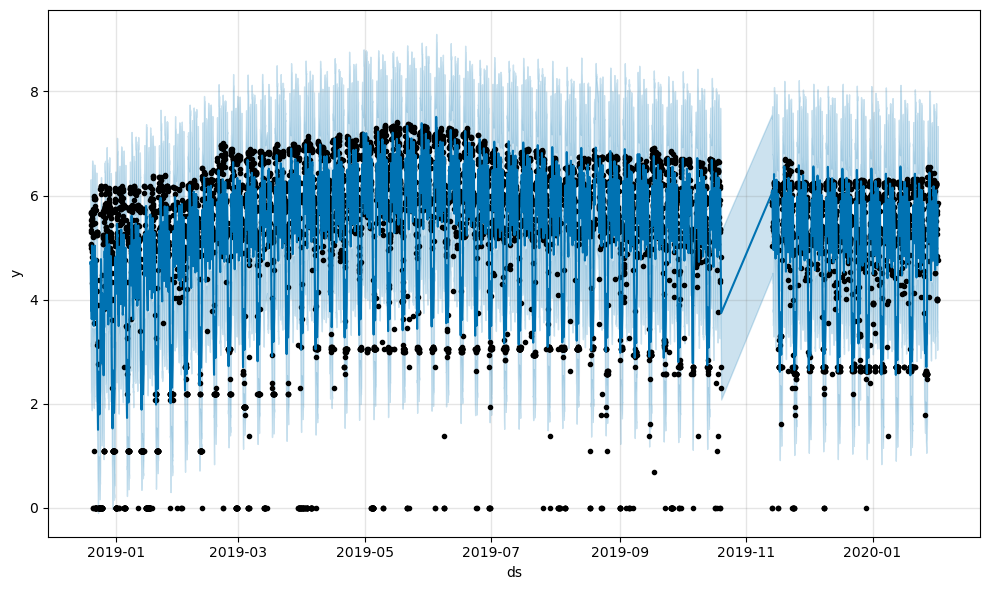

In [76]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

The values in the graph basically represents the effect of values corresponding to x-axis on result predicted on y-axis

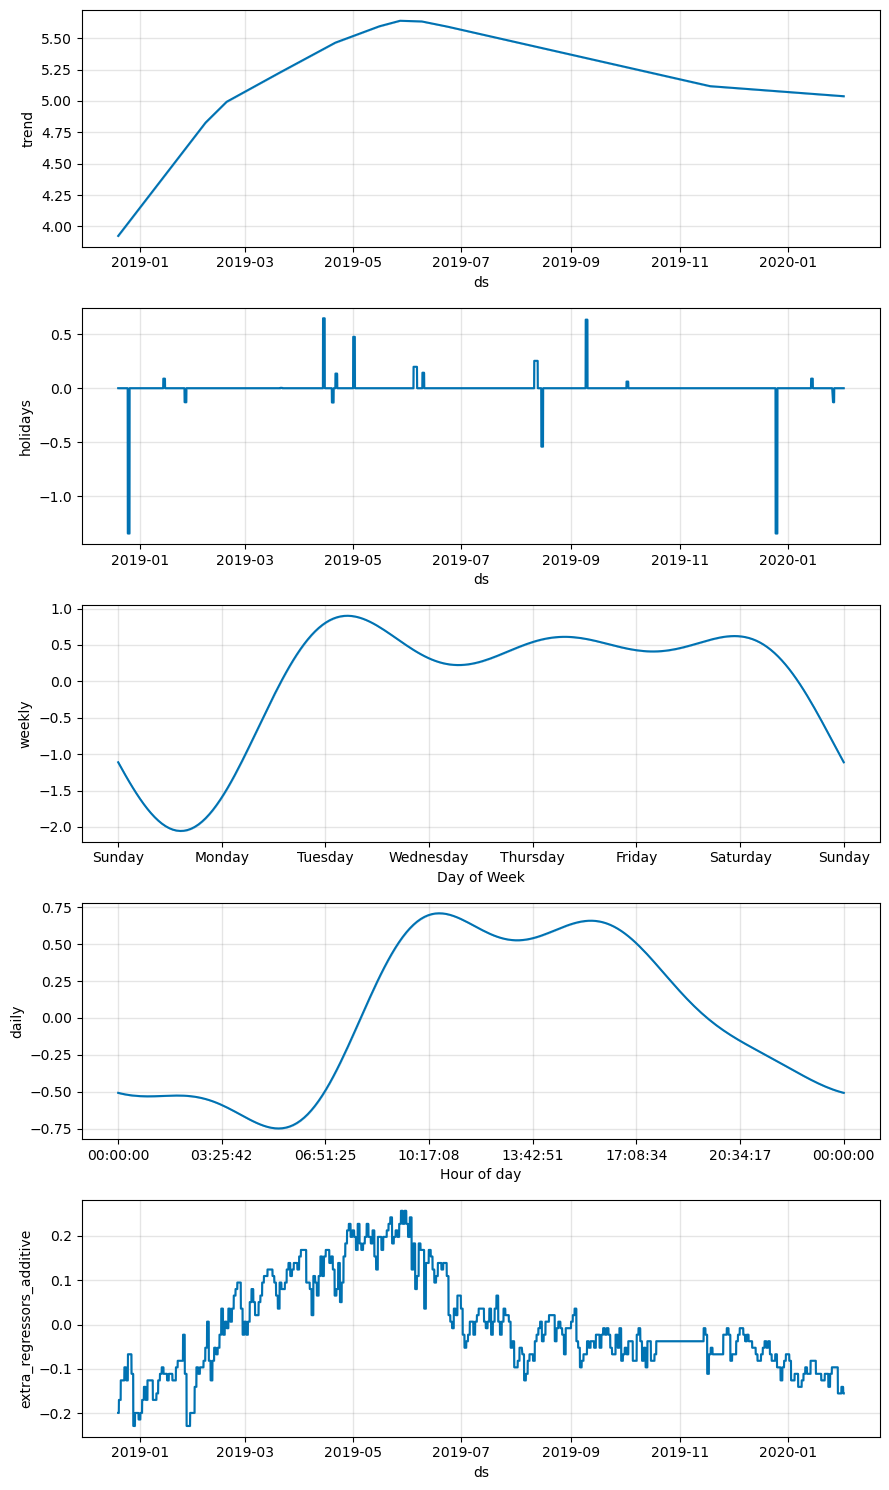

In [77]:
fig = model.plot_components(prediction)

In [78]:
df.head()

,ds,y,temp
0,2018-12-19 15:00:02,5.521461,69
1,2018-12-19 16:00:03,5.686975,69
2,2018-12-19 18:00:02,5.662960,69
3,2018-12-19 19:00:02,5.655992,69
4,2018-12-19 20:00:02,5.433722,69


In [79]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,3.923898,3.113366,6.206889,3.923898,3.923898,0.0,0.0,0.0,0.0,...,-0.198904,-0.198904,-0.198904,0.331774,0.331774,0.331774,0.0,0.0,0.0,4.692999
1,2018-12-19 16:00:03,3.924663,3.170108,6.311796,3.924663,3.924663,0.0,0.0,0.0,0.0,...,-0.198904,-0.198904,-0.198904,0.355118,0.355118,0.355118,0.0,0.0,0.0,4.730496
2,2018-12-19 18:00:02,3.926194,2.943618,6.029725,3.926194,3.926194,0.0,0.0,0.0,0.0,...,-0.198904,-0.198904,-0.198904,0.404049,0.404049,0.404049,0.0,0.0,0.0,4.446625
3,2018-12-19 19:00:02,3.926960,2.697214,5.854972,3.926960,3.926960,0.0,0.0,0.0,0.0,...,-0.198904,-0.198904,-0.198904,0.428819,0.428819,0.428819,0.0,0.0,0.0,4.247223
4,2018-12-19 20:00:02,3.927725,2.556618,5.701176,3.927725,3.927725,0.0,0.0,0.0,0.0,...,-0.198904,-0.198904,-0.198904,0.453249,0.453249,0.453249,0.0,0.0,0.0,4.100802


## Errors

In [80]:
true_val = np.exp(df.y)

In [81]:
pred_val = np.exp(org_prediction['yhat'])

In [82]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

40638.268725857386

In [83]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

137.42839015784088

## Prediction

In [84]:
data = ['2019-05-16 12:00:00']
test = pd.DataFrame(data, columns = ['ds']) 

In [85]:
test['temp'] = 80

In [86]:
test

,ds,temp
0,2019-05-16 12:00:00,80


In [87]:
val = model.predict(test)

In [88]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-16 12:00:00,5.597805,5.199387,8.343701,5.597805,5.597805,0.0,0.0,0.0,0.0,...,-0.037518,-0.037518,-0.037518,0.586111,0.586111,0.586111,0.0,0.0,0.0,6.745697


In [89]:
np.exp(val['yhat'])

0    850.391296
Name: yhat, dtype: float64

## Saving Model

In [90]:
type(model)

prophet.forecaster.Prophet

In [91]:
pkl_path = "model.pkl"

In [92]:
model.stan_backend.logger = None

In [93]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [94]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)